In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Importing the dataset into a dataframe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

import seaborn as sns

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import sklearn.model_selection as ms
import sklearn.preprocessing as preprocess
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import classification_report

In [ ]:
# !pip install pyarabic
# !pip install langdetect
# !pip install nltk

# from langdetect import detect
# import pyarabic.araby as araby
# nltk.download("all")


In [ ]:
# dataset_folder_path="/home/youssef/AUC/Spring22/CSCE493002 - Machine Learning/project/repo/datasets"
dataset_folder_path="/content/gdrive/My Drive/Colab Notebooks"
df = pd.read_csv(dataset_folder_path+'/cleanedText.csv')
# df = pd.read_csv(dataset_folder_path+'/ar_reviews_100k.csv')
df.dropna(inplace=True)
df.head()

,label,text
0,1,متز نوع ما نظف وقع جهز شاطيء طعم
1,1,احد سبب نجح امر كل شخص هذه دول عشق ترب نحن نحب...
2,1,هدف نقل صخب شرع قهر هدء جبل شيش عرف حقق ما جرى...
3,1,خلص بدء الل بهر زي فيل زرق حمد راد خطى رحل قرء...
4,1,ياس جزء لا دبي ندق كامل خدم ريح نفس وجد


In [ ]:
df_copy=df.copy()

In [ ]:
df_copy["text"]=df_copy['text'].values.astype('U')
df

,label,text
0,1,متز نوع ما نظف وقع جهز شاطيء طعم
1,1,احد سبب نجح امر كل شخص هذه دول عشق ترب نحن نحب...
2,1,هدف نقل صخب شرع قهر هدء جبل شيش عرف حقق ما جرى...
3,1,خلص بدء الل بهر زي فيل زرق حمد راد خطى رحل قرء...
4,1,ياس جزء لا دبي ندق كامل خدم ريح نفس وجد
...,...,...
66661,0,عرفش ليه كنت كمل وهي مش عجب حدث بطء ممل روي اط...
66662,0,لا سحق يكون كنق لنه سيء شي وجد خدم فطر صبح ستي...
66663,0,ضعف جدا ولم متع به كل قصه سرد لحل شهد بدن فكر
66664,0,ملة جدا حمد حسن علو فنن وصف عند دقق حد ثني قرء...


# Preprocessing

In [ ]:
import numpy as np
from langdetect import detect
from nltk.stem.isri import ISRIStemmer
from nltk import word_tokenize
import pyarabic.araby as araby
# from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


class Preprocessor:
    def __init__(self,vectorizer_path=None):
        self.vectorizer=None 
        if vectorizer_path:
            self.load_tfidf_vectorizer(vectorizer_path)
    
    def load_tfidf_vectorizer(self,path):
        file=open(path,'rb')
        self.vectorizer=pickle.load(file)
        file.close()
    
    def save_tfidf_vectorizer(self,path):
        if not self.vectorizer:
            return None
        file=open(path,"wb")
        pickle.dump(file,self.vectorizer)
        file.close()
    
    def preprocess(self,sentence,vectorizer_path=""):
#         if not self.vectorizer and vectorizer_path=="":
#             return None

        # if not self.detect_lang(sentence):
        #     print("sentence Not arabic!")
        #     return None
        
        result=self.stem(sentence)
        result=self.normalize(result)
        result=self.remove_redundant_words(result)



        return result


    def detect_lang(self,sentence):
        try:
            print("\n\nhere\n\n")
            language = detect(sentence)
            print("\n\nhere2\n\n")

            if language != 'ar':
                return False
        except:
                return False
        print("returning true")
        return True

    def stem(self,sentence):
        st = ISRIStemmer()
        stemmed_sentence=""
        for a in word_tokenize(sentence):
            stemmed=st.stem(a)
            stemmed_sentence+=(stemmed+" ")
        return stemmed_sentence
    
    def normalize(self,sentence):
        normalized=sentence
        normalized=araby.strip_tashkeel(normalized)
        normalized= araby.strip_tatweel(normalized)
        normalized=araby.normalize_hamza(normalized)
        return normalized
    
    

    def remove_redundant_words(self,sentence):
        stop_words=['من','على','عن','ب','ك','ل','فى','و','ان','هذا','او','كتب','...','.','','الى','فيه','انه','قبل','//','..','،',':',"؟",'/']
        words=sentence.split()
        resultWords= [word for word in words if word not in stop_words]
        return ' '.join(resultWords)
    
    def convert_to_tfidf(self,sentence):
        if not self.vectorizer:
            return None
        print(self.vectorizer)
        return self.vectorizer.transform([sentence])



ModuleNotFoundError: ignored

# Shuffle

In [ ]:
#shuffling
from  sklearn.utils import shuffle
df_shuffled=shuffle(df_copy,random_state=0)
df_shuffled

,label,text
49567,0,ندق جيد جدا جمع عمل بصف عمه ماز بحس عدم وفر بع...
34054,0,كانت قمة غير امن قرب حرم كنت نيم الا حصل عمل ن...
66092,0,خدم فشل وقع
27894,1,سلم يا ربى بتر ما طير غنى دير عظم ترث بقى خلد ...
15692,1,اه كعد غزي قصب رءع
...,...,...
42056,0,روي لم ابد ليس قصة وضح طيع اقل ثلث قصص وحد اضف...
21270,1,لءب يعط عقد دخل لحل بعض يجب قرت حفظ انت هنا ام...
45957,0,به واد كثر خلف شرع سلم بعض حتى كنى نعم باب اخف...
42676,0,ندق فشل لا همم حجز كينق تم تغر غرف طرق دون علم...


In [ ]:


#Splitting data
x=df_shuffled['text']
y=df_shuffled['label']
X_train,X_test,Y_train, Y_test = train_test_split(x, y, test_size=0.1, random_state=1)
# X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train,test_size=0.25,random_state=1)

print("Train: " ,X_train.shape,Y_train.shape,"\nValidation:",X_test.shape,Y_test.shape)

Train:  (59899,) (59899,) 
Validation: (6656,) (6656,)


In [ ]:
X_train.values.shape, Y_train.values.shape

((59899,), (59899,))

# Embedding

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
from keras import metrics
import keras
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = "0"


In [ ]:
# Helper functions

def get_num_of_unique_words():
  vocab_size = 2363*5 #hard coded(should be the number of words in docs)
  return vocab_size

def get_max_sentence_length(docs):
  max_length=len(max(docs,key=len).split())
  return max_length

# integer encode the documents
def get_encoded_docs(docs,encoding_depth):
  encoded_docs = [one_hot(d, encoding_depth) for d in docs]
  # print(encoded_docs)
  return encoded_docs

# pad documents to a max length of `max_length` words
def get_padded_docs(docs,max_padding_length):
  padded_docs = pad_sequences(docs, maxlen=max_padding_length, padding='post')
  # print(padded_docs)
  return padded_docs

def process_docs(docs, max_padding_length,encoding_depth):
  encoded_docs=get_encoded_docs(docs,encoding_depth)
  padded_docs=get_padded_docs(encoded_docs,max_padding_length)
  return padded_docs
def calculate_f1(recall,precision):
  eps=1e-07
  return (2*recall*precision)/(recall+precision+eps)
  

In [ ]:
all_docs=df_shuffled['text'].values

max_sentence_length=get_max_sentence_length(all_docs)
vocab_size=get_num_of_unique_words()

docs_train=process_docs(X_train.values,max_sentence_length,vocab_size)
labels_train=Y_train.values

docs_test=process_docs(X_test.values,max_sentence_length,vocab_size)
labels_test=Y_test.values

In [ ]:
print('trainig shapes: {}, {} \ntesting shapes: {}, {}'.format(docs_train.shape,labels_train.shape,docs_test.shape,labels_test.shape))


trainig shapes: (59899, 591), (59899,) 
testing shapes: (6656, 591), (6656,)


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_sentence_length))
model.add(Flatten())
model.add(Dense(32,activation = "relu"))
model.add(Dense(8,activation = "relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',keras.metrics.Recall(),keras.metrics.Precision()])
early_stopping= EarlyStopping(monitor='val_loss',patience=3)

print(model.summary())
# fit the model
hist=model.fit(docs_train, labels_train, epochs=300, verbose=1,
          batch_size=512,use_multiprocessing=True,
          workers=10000,validation_split=0.25,callbacks=[early_stopping])


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_31 (Embedding)    (None, 591, 64)           756160    
                                                                 
 flatten_31 (Flatten)        (None, 37824)             0         
                                                                 
 dense_72 (Dense)            (None, 32)                1210400   
                                                                 
 dense_73 (Dense)            (None, 8)                 264       
                                                                 
 dense_74 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,966,833
Trainable params: 1,966,833
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
88/88 [===================

In [ ]:
# evaluate the model
loss,accuracy, recall,precision = model.evaluate(docs_test, labels_test, verbose=1)
print('accuracy: %f recall: %f, precision: %f, f1_score: %f' % ((accuracy*100),(recall*100),(precision*100),(calculate_f1(recall,precision)*100)))

208/208 [==============================] - 32s 3ms/step - loss: 0.3707 - acc: 0.8341 - recall_10: 0.8473 - precision_10: 0.8297
accuracy: 83.413464 recall: 84.733731, precision: 82.966399, f1_score: 83.840747


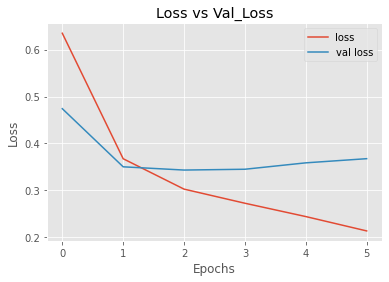

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)
tf_x_val=vectorizer.transform(X_val)

In [ ]:
vectorizer_file_path="tfidfVectorizerDump.joblib"
with open(vectorizer_file_path,"wb") as f:
        pickle.dump(vectorizer, f)

In [ ]:
print(tf_x_train.shape,tf_x_val.shape,tf_x_test.shape)

## Nerual Networks

In [ ]:
class AdamOptimizer:
    def __init__(self,beta1,beta2,alpha,eps=10e-8):
        self.beta1=beta1
        self.beta2=beta2
        self.alpha=alpha
        self.eps=eps
        self.ms=[]
        self.vs=[]
        
    def reset_params(self,layers):
        self.ms=[ 
                  [np.zeros_like(layer.W,dtype=np.float64), np.zeros_like(layer.b,dtype=np.float64)] 
                  for layer in layers      
                 ]
        self.vs=[ 
                  [np.zeros_like(layer.W,dtype=np.float64), np.zeros_like(layer.b,dtype=np.float64)] 
                  for layer in layers      
                 ]
        
    def update(self,layers,N):
        for i in range(len(layers)):
            self.ms[i][0]= self.beta1*self.ms[i][0]+(1.0-self.beta1)*layers[i].dW
            self.ms[i][1]= self.beta1*self.ms[i][1]+(1.0-self.beta1)*layers[i].db
            
            self.vs[i][0]= self.beta2*self.vs[i][0]+(1.0-self.beta2)*np.square(layers[i].dW)
            self.vs[i][1]= self.beta2*self.vs[i][1]+(1.0-self.beta2)*np.square(layers[i].db)

            denDW= np.sqrt((self.vs[i][0] + self.eps))
            denB=(np.sqrt((self.vs[i][1] + self.eps)))
            
            numDW=(-1 * self.alpha * self.ms[i][0])
            numB=(-1 * self.alpha * self.ms[i][1])
                    
            deltaW = np.array(numDW /denDW ,dtype=np.float64)
            deltab = np.array( numB/ denB  ,dtype=np.float64)
        
            layers[i].W +=  deltaW/N
            layers[i].b +=  deltab/N
        
class GradientDescent:
    def __init__(self,alpha):
        self.alpha=alpha
    def reset_params(self,layers):
        pass
    def update(self,layers,N):
        for i in range(len(layers)):
            # layers[i].dW=layers[i].dW/N
            # layers[i].db=layers[i].db/N
            layers[i].W = layers[i].W - self.alpha * (layers[i].dW/N)
            layers[i].b = layers[i].b - self.alpha * (layers[i].db/N)

In [ ]:
import numpy as np
import pickle


class Layer:
    
    ### activations
    def _relu(self,z):
        return np.maximum(0,z)
    def _diff_relu(self,z):
        dZ=np.array(z,copy=True)
        dZ[dZ<=0]=0
        dZ[dZ>0]=1
        return dZ
    
    def _identity(self,z):
        return z
    
    def _identity_diff(self,z):
        return np.ones_like(z)
    
    def _sigmoid(self,z):
        return (1/(1+np.exp(-1*z)))

    def _diff_sigmoid(self,z):
        return self._sigmoid(z)*(1-self._sigmoid(z))
    
    def _softmax(self,z):
        expZ= np.exp(z-np.max(z))
        return expZ/expZ.sum(axis=0, keepdims=True)
    def _diff_softmax(self,z):
        pass

    
    ###########

    def __init__(self,n_input,n_output, activation="identity",name=None):
        self.n_output= n_output
        self.n_input= n_input
        self.name= name
        
        if activation == "identity":
            self.activation = self._identity
            self.diff_act= self._identity_diff
        
        elif activation == "sigmoid":
            self.activation = self._sigmoid
            self.diff_act= self._diff_sigmoid
            
        elif activation == "softmax":
            self.activation=self._softmax
            self.diff_act=self._diff_softmax
        elif activation =="relu":
            self.activation=self._relu
            self.diff_act=self._diff_relu
            
        self.reset_params()
            
        
    def reset_params(self): 
        self.W= np.random.randn(self.n_output,self.n_input)*np.sqrt(2/self.n_input)
        self.b= np.random.randn(self.n_output,1)*np.sqrt(2/self.n_input)

        self.dW= np.zeros_like(self.W)
        self.db= np.zeros_like(self.b)
        
        self.Z= None
        self.Ai = None
    def print_shapes(self):
        print("W: ",self.W.shape)
        print("b: ",self.b.shape)
    
    def forward(self,Ai): #data dim 

        z =  np.add((self.W @ Ai),self.b)
        A = self.activation(z)

        
        self.Z = z
        self.Ai = Ai
        return A
    
    
    def backward(self,inp):
        
       
        act_diff = self.diff_act(self.Z)
        
        tmp = inp * act_diff
        
        bet = tmp @ self.Ai.T # vector of 1s
        
        
        e = np.ones((self.Ai.shape[1],1))
        db = tmp @ e

        self.dW = (self.dW + bet)
        self.db = self.db + db
        
        
        return self.W.T @ tmp
    
    def print_weights(self):
        print("\n###################")
        if(self.name):
            print("name: ",self.name)
        print("dW: ",self.dW, "W: ",self.W)
    
    def zeroing_delta(self):
        self.dW= np.zeros_like(self.W)
        self.db= np.zeros_like(self.b)


class NN:
    
    ########
    ## losses
    def _MSE(self,y,yhat):
        a=np.square(yhat-y)
        a=np.sum(a)
        b= 1/(2*y.shape[1])
        return a*b

    ## diff losses
    def _diff_MSE(self,y,yhat,X):
        return (yhat-y)
    
    def _binary_cross_entropy(self,y,yhat):
        arr= -(y*np.log(yhat)+(1-y)*np.log(1-yhat))
        return arr.mean()
        
    def _diff_binary_cross_entropy(self,y,yhat,X):
        dl_dyhat= -(y/(yhat) - (1-y)/(1-yhat))
        return dl_dyhat
 
    
    #########
    
    def __init__(self,optimizer=None,loss="binary_cross"):
        self.layers = []
        self.optimizer=optimizer
        self.loss_name=loss
        self.initialize_loss()
    
   
    def initialize_loss(self): 
        if(self.loss_name=="binary_cross"):
            self.loss=self._binary_cross_entropy
            self.loss_diff=self._diff_binary_cross_entropy
        elif self.loss_name=="MSE":
            self.loss=self._MSE
            self.loss_diff=self._diff_MSE
        
    
    def reset_layers(self):
            for layer in self.layers:
                layer.reset_params()
    
    def forward(self,x_train):
        a=x_train
        for layer in self.layers:
            a = layer.forward(a)
        return a
    
    def backward(self,input):
        gd = input
        for layer in self.layers[::-1]:
            gd = layer.backward(gd)
            
    def add_layer(self,n_input,n_output, activation="identity",name=None):
        self.layers.append(Layer(n_input,n_output, activation=activation,name=name))
    
    def batch(self,x,y,batch_size):
        x= x.copy()
        y=y.copy()
        reminder= x.shape[0] % batch_size


        for i in range(0,x.shape[0],batch_size):
            yield (x[i:i+batch_size],y[i:i+batch_size])
        
        if reminder !=0:
            yield (x[x.shape[0]-reminder:],y[x.shape[0]-reminder:] )
    
    def fit(self, x_train,y_train,validation_data=None,batch_size=32, epochs=5): #data dim is MxN .. M no of examples.. N no of dimension
        
        M = x_train.shape[0]

        no_of_batches= np.ceil(M/batch_size)
        if(validation_data):
            x_valid=validation_data[0]
            y_valid=validation_data[1]
        
        
        for i in range(epochs):
            
            print("Epoche {}/{}".format(i+1,epochs))
            self.optimizer.reset_params(self.layers)
            batches=self.batch(x_train,y_train,batch_size)
            losses=[]
            j=0
            for cur_x,cur_y in batches:
                
                cur_x=cur_x.T
                cur_y=cur_y.T
                
                y_hat= self.forward(cur_x)

                dl_dyhat = self.loss_diff(cur_y,y_hat,self.layers[-1].Ai)
                loss=self.loss(cur_y,y_hat)
                
                losses.append(loss)

                self.backward(dl_dyhat)
                
                if batch_size==1:
                    N= M
                else:
                    N=cur_x.shape[-1]
                
                self.optimizer.update(self.layers,N)

                # zeroing deltas
                for layer in self.layers:
                    layer.zeroing_delta()
                j+=1
                
            if validation_data:
                y_hat_val = self.forward(x_valid.T)
                loss_val= self.loss(y_valid.T,y_hat_val)
                print("val_loss: {}....".format(loss_val),end=" ")
                ######
                #calc metrics
            avg_loss= np.array(losses).mean()
            if(avg_loss<0.05):
                print("Stopping early because loss converged to a small number")
                print("losses avg=",avg_loss)
                break
            else: print("losses avg=",avg_loss)

                

        print("Finished....") 
            
            
        

    
    def predict(self,x_test): #data dim is NxD .. N no of examples.. D no of dimension
        y_hat= self.forward(x_test.T).T

        y_hat[y_hat>0.5]=1
        y_hat[y_hat<=0.5]=0
        return y_hat
                    
    def print_weights(self):
        for i in range(len(self.layers)):
            print("layer i= ",i,end=" ")
            self.layers[i].print_weights()
    def print_shapes(self):
        for layer in self.layers:
            layer.print_shapes()
    
    def save_model(self,path):
        model=[self.layers,self.optimizer,self.loss]

        file=open(path,"wb")
        print("dumped model: ",model)

        pickle.dump(model,file)

        file.close()

    def load_model(self,path):
        file=open(path,"rb")

        model=pickle.load(file)

        file.close()
        print("loaded model: ",model)
        
        self.layers,self.optimizer,self.loss=model
        self.initialize_loss()

    

In [ ]:
print(tf_x_train.shape)
print(tf_x_test.shape)
print(tf_x_val.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:

adam= AdamOptimizer(beta1 = 0.9,beta2 = 0.99,alpha=0.1,eps=0.001)
nn = NN(optimizer=adam)

nn.add_layer(tf_x_train.shape[1],64,activation="relu",name="l1")
nn.add_layer(64,32,activation = "relu",name="l2")
nn.add_layer(32,8,activation = "relu",name="l4")
nn.add_layer(8,1,activation = "sigmoid",name="l5")



In [ ]:
nn.fit(tf_x_train,Y_train,validation_data=[tf_x_val,Y_val],batch_size=32,epochs=1)
# nn.load_model("modelDump.joblib")


In [ ]:
y_pred=nn.predict(tf_x_test)

In [ ]:
print(len(y_pred))
np.unique(y_pred,return_counts=True)

In [ ]:
# Y_test
print(classification_report(y_pred,Y_test))


In [ ]:
#dump model
nn.save_model("modelDump.joblib")

In [ ]:
file=open("tfidfVectorizerDump.joblib","wb")
pickle.dump(file,vectorizer)